In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('Inputs/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* **Split train data to train (%80) and validation (%20)**

In [10]:
X = data[['YearBuilt', 'GarageArea', 'PoolArea', 'FullBath', '1stFlrSF', '2ndFlrSF']].values
Y = data[['SalePrice']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape,

((1168, 6), (292, 6), (1168, 1), (292, 1))

* **Implement a neural network model for predict house sales prices**

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
    ])

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'mae')

In [18]:
output = model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 2ms/step - loss: 179892.6562
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 179890.7969
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 179887.1094
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 179879.8906
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 179866.5781
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 179844.6406
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 179811.9688
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 179763.5000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 179694.8281
Epoch 10/300
37/37 [==============================] - 0s 2ms/step - loss: 179604.2344
Epoch 11/300
37/37 [==============================] - 0s 2ms/step - loss: 179490.7344
Epoch 12/300
37/37 [==============================] - 0s 2ms/st

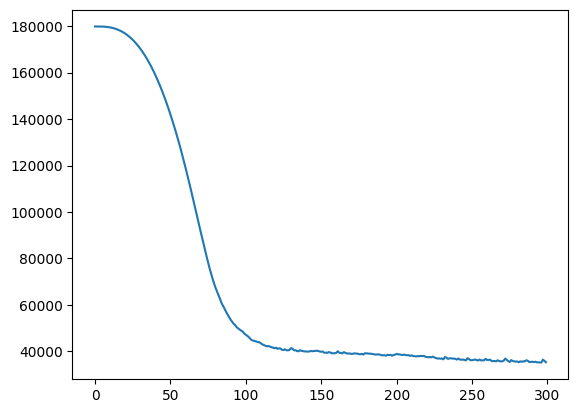

In [21]:
plt.plot(output.history['loss'])
plt.show()

* **Evaluate your trained model on validation data (You should achieve an loss < $50000)**

In [20]:
loss = model.evaluate(X_train, Y_train)
loss

37/37 [==============================] - 0s 2ms/step - loss: 35116.6836


35116.68359375

* **Predict yourself house price with your trained model**

In [25]:
my_house = np.array([[2004, 1850, 0, 2, 750, 0]])
model.predict(my_house)

1/1 [==============================] - 0s 33ms/step


array([[264422.53]], dtype=float32)

* **Save your trained model as a `*.h5` extension file**

In [27]:
model.save('Outputs/my_model.h5')

In [13]:
# model = tf.keras.models.load_model('my_model.h5 ')
# How to use saved Model

* **test file prediction for kaggle competition**

In [28]:
data = pd.read_csv('Inputs/test.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [29]:
X = data[['YearBuilt', 'GarageArea', 'PoolArea', 'FullBath', '1stFlrSF', '2ndFlrSF']].values
X.shape

(1459, 6)

In [55]:
Prediction = np.array(model.predict(X)).reshape(-1,)
Prediction = pd.DataFrame({'SalePrice':pd.Series(Prediction, index=data['Id'])})
Prediction.head()

 1/46 [..............................] - ETA: 1s

46/46 [==============================] - 0s 2ms/step


,SalePrice
Id,
1461,144248.968750
1462,144248.968750
1463,201147.000000
1464,144390.640625
1465,144248.968750


In [49]:
Prediction.to_csv('Outputs/test_prediction.csv')